
# [More Multivariate Normal Things](https://www2.stat.duke.edu/~rcs46/lecturesModernBayes/601-module10-multivariate-normal/multivariate-normal.pdf)


## What is not Multivariate Regression
* this is not the same multiple linear regression, it means the output $y$ should have multiple outcomes
* each of the $n$ observations are $(y_i \mid x_i)$ where the $x_i$ is given - not a generative model, still a predictive model
  * the $y$ is now multivariate with dimension/length $n$ and $x$ is length $p$ (there are $p$ predictors)
    * each $y_i$ is it's own multivariate distribution
  * every element of $y$ is calculated using the same $x_i$
---

Rather than $\mathbf{y}_{n\times 1} \sim \mathcal{MVN}(\mathbf{X}_{n\times p}\boldsymbol{\beta}_{p\times 1}, \Sigma_{n\times n} = \sigma^2I_{n\times n})$

- where we used a multivariate $\mathcal{MVN}(\underset{p \times 1}{\boldsymbol\beta_0}, \underset{p \times p}{\Sigma_\beta})$ prior fo  $\boldsymbol \beta_{p\times 1}$
- and a univariate prior for precision $\phi = \sigma^{-2}$ or variance $\sigma^2$ such as $\text{gamma}(a,b)$ or $\mathcal{IG}(a,b)$

what about $\underset{m\times 1}{\mathbf{y}_i} \overset{\text{iid}}{\sim} \mathcal{MVN} \left( \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i}, \Sigma_{m\times m} \right), \quad \Sigma_{m\times m} \neq \sigma^2 I_{m\times m}
$ which models

- $\underset{n\times m}{\mathbf{y}}$ with
    - $E[\underset{n\times p}{\mathbf{y}}| \underset{n\times m}{\mathbf{X}} ] = \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m}$
    - $COV\left[\underset{\text{both } m\times 1}{(\mathbf{y}_i, \mathbf{y}_j)}\right] = \Sigma_{m\times m}
  $


The **likelihood** is
   
$\begin{align*}
f(\underset{n\times m}{\mathbf{y}}|\underset{n\times p}{\mathbf{X}}, \boldsymbol{\beta}_{p\times m}, \Sigma_{m\times m})
& ={} \prod_{i=1}^n (2\pi )^{-m/2}\det(\Sigma_{m\times m})^{-1/2}\,\exp \left(-{\frac {1}{2}}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )^\top \Sigma_{m\times m}^{-1}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )\right)\\
& \propto{} \det({ {\Sigma }})^{-n/2}\,\exp \left(\sum_{i=1}^n -{\frac {1}{2}}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )^\top\Sigma_{m\times m}^{-1}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )\right)\\
& \quad\; \text{The trace of a square matrix is the sum of its diagonal elements}\\
& = \det({ {\Sigma }})^{-n/2}\,\exp \left(-\frac{1}{2} \text{trace}\big((\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m}) \Sigma_{m\times m}^{-1} (\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m})^\top\big)\right)\\
& = \det({ {\Sigma }})^{-n/2}\,\exp \overset{\Large \text{trace}(ABC) \; = \;  \text{trace}(CAB)}{\left( -\frac{1}{2} \text{trace}\big((\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m})^\top(\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m}) \Sigma_{m\times m}^{-1} \big)\right)}\\
& = \det({\Sigma})^{-n/2}\,\exp \left( -\frac{1}{2} \text{trace}\big(\underset{\text{both } m\times m}{\boldsymbol \epsilon^\top \boldsymbol \epsilon} \underset{m\times m}{\Sigma^{-1}}\big)\right)\\
& = \det({\Sigma})^{-n/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} \underset{m\times m}{\Sigma^{-1}}\big) \right)\\
& \propto {}
\mathcal{W}^{-1}\left({\mathbf\Psi} = \tilde{\underset{m\times m}{\boldsymbol \Psi}}, \nu = n-m-1 \right)
\end{align*}$

an [Inverse-Wishart](https://en.wikipedia.org/wiki/Inverse-Wishart_distribution) distribution when viewed as a function of $\Sigma$.


## Inverse-Wishart Distributions

---

Thus for an **inverse Wishart** $\mathcal{W}^{-1}\left({\mathbf\Psi} = \underset{m\times m}{\boldsymbol \Psi_0}, \nu = n_0+m+1 \right)$
 prior for covariance $\Sigma_{m\times m}$ the **full conditional**

$\begin{align*}
f(\Sigma_{m\times m} | \underset{n\times m}{\mathbf{y}},\underset{n\times p}{\mathbf{X}}, \boldsymbol{\beta}_{p\times m}) &\propto{}
f(\underset{n\times m}{\mathbf{y}}|\underset{n\times p}{\mathbf{X}}, \boldsymbol{\beta}_{p\times m}, \Sigma_{m\times m}) \times p(\Sigma)\\
&\propto{}
\det({\Sigma})^{-n/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} \underset{m\times m}{\Sigma^{-1}}\big) \right) \times
\det({\Sigma})^{-(n_0+m+1)/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( {\underset{m\times m}{\boldsymbol \Psi_0}} \underset{m\times m}{\Sigma^{-1}}\big) \right)\\
&\propto{}
\det({\Sigma})^{-(n+n_0+m+1)/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} \underset{m\times m}{\Sigma^{-1}}\big) -\frac{1}{2} \text{trace}\big( {\underset{m\times m}{\boldsymbol \Psi_0}} \underset{m\times m}{\Sigma^{-1}}\big) \right)\\
&\propto{}
\det({\Sigma})^{-(n+n_0+m+1)/2}\,\exp \left( -\frac{1}{2} \text{trace}\Big( \big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} + {\underset{m\times m}{\boldsymbol \Psi_0}} \big) \underset{m\times m}{\Sigma^{-1}} \Big) \right)
\end{align*}$

is also seen to be an **inverse Wishart** $\mathcal{W}^{-1}\left({\mathbf\Psi} = \tilde{\underset{m\times m}{\boldsymbol \Psi}} + \underset{m\times m}{\boldsymbol \Psi_0}, \nu = n+n_0+m+1 \right)$

---

## Conditional MVN distributions (are MVN distributions)

For **MVN** $f( \mathbf{\tilde x} = (\mathbf x,\mathbf x^*) )$

$$p\left(\mathbf{\tilde x}\;\Bigg|\;\boldsymbol \mu = \left[\begin{array}{c} \underset{q\times1}{\boldsymbol \mu_{\mathbf{ x}}}\\ \underset{r\times1}{\boldsymbol \mu_{\mathbf{ x^*}}} \end{array} \right], \boldsymbol \Sigma = \left[\begin{array}{cc}  \underset{q\times q}{{\boldsymbol {\Sigma }}_{\mathbf{x}}} &  \underset{q\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x},\mathbf{x^*}}}\\  \underset{r \times q}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}} =  {\boldsymbol {\Sigma }}_{\mathbf{x},\mathbf{x^*}}^T} &  \underset{r\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x*}}}\end{array}\right] \right) = {\frac {\exp \left(-{\frac {1}{2}}\left({\mathbf {\tilde x} }-{\boldsymbol {\mu }}\right)^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}\left({\mathbf {\tilde x} }-{\boldsymbol {\mu }}\right)\right)}{\sqrt {(2\pi )^{q+r}|{\boldsymbol {\Sigma }}|}}}$$

the **conditional distribution** $f(\mathbf x^* | \mathbf x)$ of [is also **MVN**](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Conditional_distributions)

$$\mathbf{x^*} | \mathbf x, \boldsymbol \mu, \boldsymbol \Sigma \sim  \mathcal{MVN}\left( {\bar {\boldsymbol {\mu }}}= \underset{q\times1}{{\boldsymbol {\mu }}_{\mathbf{x^*}}}+ \underset{q\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}}}  \underset{r\times r}{{\boldsymbol {\Sigma}}^{-1}_{\mathbf{x}}} \underset{r\times1}{\left(\mathbf {x} -{\boldsymbol {\mu }}_{\mathbf{x}}\right)},  {\overline {\boldsymbol {\Sigma }}}= \underset{q\times q}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}}}- \underset{q\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}}}  \underset{r\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x}}^{-1}} \underset{r\times q}{{\boldsymbol {\Sigma }}_{\mathbf{x},\mathbf{x^*}}}  \right)$$

though if ${\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}} = \mathbf{0}_{m \times n}$ then $\mathbf{x^*}$ is independent of $\mathbf{x}$



## What is Multivariate Regression?

For

- $y_{ik}$ the $k^{th}$ element of observation vector $\textbf{y}_{i}$
- $\textbf{y}_{i,-k}$ the vector of all other elements
- $\Sigma_{k,-k}$ the $k^{th}$ row without $\sigma_k^2 = \Sigma_{kk}$ and $\Sigma_{-k,k}$ the same for columns
- $\Sigma_{-k,-k}$ the $\Sigma$ matrix without the $k^{th}$ row and column
- $\boldsymbol \beta_k$ the vector corresponding to the $k^{th}$ row if $\boldsymbol \beta$
- $\boldsymbol \beta_{-k}$ the $\boldsymbol \beta$ without the $k^{th}$ row

$\begin{align*}
p(y_{ik}|\textbf{y}_{i,-k}, \text{etc.}) &={} \mathcal{N} (y_{ik}|\textbf{x}_i^\top \boldsymbol \beta_k + \Sigma_{k,-k}\Sigma_{-k,-k}^{-1} \left( \textbf{y}_{i,-k} - \boldsymbol \beta_{-k} \textbf{x}_i \right), \sigma^2_k - \Sigma_{k,-k}\Sigma_{-k,-k}^{-1}\Sigma_{-k,k})) \\
&={} \mathcal{N} (y_{ik}|\textbf{x}_i^\top \boldsymbol \beta_k + \left( \textbf{y}_{i,-k} - \boldsymbol \beta_{-k} \textbf{x}_i \right)^\top \Sigma_{-k,-k}^{-1}\Sigma_{-k,k}, \sigma^2_k - \Sigma_{k,-k}\Sigma_{-k,-k}^{-1}\Sigma_{-k,k})
\end{align*}$

Thus for $\underset{n\times 1}{\mathbf{y}_k}$ the $k^{th}$ column of $\underset{n\times m)}{\mathbf{y}}$ and $\underset{n\times (m-1)}{\mathbf{y}_{-k}}$ the matrix $\underset{n\times m}{\mathbf{y}}$ without its $k^{th}$ column

$\begin{align*}
\prod_{i=1}^n p(y_{ik}|\textbf{y}_{i,-k}, \text{etc.}) &\propto{} \exp\left(-\frac{\big(\underset{n\times 1}{\mathbf{y}_k} - (\underset{n\times (m-1)}{\mathbf{y}_{-k} - \textbf{X} \boldsymbol \beta_{-k}} )\underset{n\times 1}{\Sigma_{-k,-k}^{-1}\Sigma_{-k,k}} - \underset{n\times 1}{\textbf{X} \boldsymbol \beta_k} \big)^{\top}\big(\underset{n\times 1}{\mathbf{y}_k} - (\underset{n\times (m-1)}{\mathbf{y}_{-k} - \textbf{X} \boldsymbol \beta_{-k}} )\underset{n\times 1}{\Sigma_{-k,-k}^{-1}\Sigma_{-k,k}} - \underset{n\times 1}{\textbf{X} \boldsymbol \beta_k} \big)}{2(\sigma^2_k - \Sigma_{k,-k}\Sigma_{-k,-k}^{-1}\Sigma_{-k,k})} \right)
\end{align*}$

which is a **linear regression model** with an adjustment for the **residuals** of the other $k-1$ regression models based on the covariance structure of the outcomes $\Sigma$




While the outcomes are a little more complex than usual, when viewed as a function of the $k^{th}$ column $\underset{p\times 1}{\boldsymbol{\beta}_k}$ of $\boldsymbol{\beta}_{p\times m}$ this is just a **standard linear regression model**

Which suggests a multivariate $\mathcal{MVN}(\underset{p \times 1}{\boldsymbol\beta_0}, \underset{p \times p}{\Sigma_\beta})$ prior for each $\underset{p\times 1}{\boldsymbol{\beta}_k}$

$\begin{align*}
f(\boldsymbol{\beta}_{k} | \underset{n\times m}{\mathbf{y}}, \underset{n\times p}{\mathbf{X}}, \underset{n\times (m-1)}{\boldsymbol \beta_{-k}}, \Sigma_{m\times m})
& \propto{} \prod_{i=1}^n p(y_{ik}|\textbf{y}_{i,-k}, \text{etc.}) \times p(\boldsymbol{\beta}_{k}) \\
& \propto{} \exp \left( -\frac{1}{2} (\underset{n\times 1}{\mathbf{\tilde y}_k} - \underset{n\times p}{\mathbf{X}}\underset{p\times 1}{\boldsymbol{\beta}_k})^\top \tilde \sigma_{k}^{-2}(\underset{n\times 1}{\mathbf{\tilde  y}_k} - \underset{n\times p}{\mathbf{X}}\underset{p\times 1}{\boldsymbol{\beta}_k})\right) \times \exp \left(-{\frac {1}{2}}(\boldsymbol\beta - \boldsymbol\beta_0)^\top \Sigma_\beta^{-1}(\boldsymbol\beta - \boldsymbol\beta_0)\right) \\
& \propto{} \mathcal{MVN}\left( COV \times \big(\Sigma_\beta^{-1} \beta_0 + \sigma_{k}^{-2}\mathbf{X}^\top \mathbf{\tilde y}_k\big), COV = \big(\Sigma_\beta^{-1} + \tilde \sigma_{k}^{-2}\mathbf{X}^\top\mathbf{X}\big)^{-1}  \right)
\end{align*}$




## More on Inverse-Wishart Distributions


In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
p = 2
dimension = 2 # dimension
# scale matrix
Psi = np.eye(dimension)  # 2x2 identity
try:
    nu = 101 # nu must be greater than p-1 or else inverse wishart is undefined
    # nu is the "degrees of freedom"
    stats.invwishart(df=nu, scale=Psi).rvs()

except ValueError as error:
    print(error)

print("|Sigma|^{nu+p+1} with nu =", nu," > p-1 =",p-1,"?")

|Sigma|^{nu+p+1} with nu = 101  > p-1 = 1 ?



$$E[\boldsymbol \Sigma] = \frac{\boldsymbol\Psi}{\nu - p - 1} \text{ for } \boldsymbol \Sigma \sim \mathcal{W}^{-1}(\boldsymbol \Psi,\nu) \text{ is defined for } \nu>p+1$$


In [3]:
                       # df=p-1 obviously won't work...
denom = 0              # df=p+1 won't work...
myIWD = stats.invwishart(df=p+1+denom, scale=Psi*[1,denom][denom>0])
myIWD.rvs(size=10000).mean(axis=0)

array([[11.04245694, -1.95676182],
       [-1.95676182,  7.62223969]])

## The LKJ (not Inverse-Wishart) prior

The **covariance matrix** $ \Sigma_{p \times p} = {D R D} = {D LL^\top D}$ for
- ${D} = \operatorname{diag}(\boldsymbol \sigma)$ the diagonal matrix of **standard deviations**
- ${R}$ the **correlation matrix** with all diagonal values equal to $1$
- ${L}$ the lower diagonal of the **Cholesky decomposition** of ${R}$

The **LKJ (Lewandowski-Kurowicka-Joe) prior** is [simpler to evaluate](https://mc-stan.org/docs/functions-reference/cholesky-lkj-correlation-distribution.html)  than the **Inverse-Wishart**

$$\require{cancel}
\begin{align*}
p( {R}) &\propto {}\det({R})^{\eta -1}\\
f^{-1}( {L}) &={} {L} {L}^\top = R\\
p( {L}) &\propto{} \det({LL^\top})^{\eta -1} \det(J) = \underbrace{\left(\prod_{k=1}^p  {L}_{kk}\right)^{\eta -1}}_{\det({L})^{\eta -1}}\underbrace{\left(\prod_{k=1}^p  {L}_{kk}^\top\right)^{\eta -1}}_{\det({L^\top})^{\eta -1}} \underbrace{\left(\prod_{k=1}^p 2 {L}_{kk}^{p+1-k}\right)}_{\det(J)} = 2 \prod_{k=1}^p  {L}_{kk}^{p+1-k + 2(\eta-1)}\\
J &={} \frac{d f^{-1}( {L})}{d  {L}} \quad J_{ij} = \frac{d {r}_i}{d {l}_j}\\
\end{align*}$$

since (1) the determinant of a product is the product of the determinants, (2) the determinant of a triangular matrix is the product of the diagonals, and (3) the Jacobian matrix $J$ is also triangular as given below.



$\begin{align*}
LL^T &={}
\begin{array}{|c|c|c|}
\hline
l_1 = L_{11} & & \\\hline
l_2 = L_{21} & l_4 = L_{22} &\\\hline
l_3 = L_{31} & l_5 = L_{32} & l_6 = L_{33} \\\hline
\end{array} \times
\begin{array}{|c|c|c|}
\hline
L_{11} & L_{21} & L_{31} \\\hline
 & L_{22} &  L_{32} \\\hline
 & & L_{33} \\\hline
\end{array}\\
&={}
\begin{array}{|l|l|l|}
\hline
r_1 = R_{11} = L_{11}^2 & r_2 & r_3 \\\hline
r_2 = R_{12} = L_{21}L_{11} & r_4 = R_{22} = L_{12}^2 + L_{22}^2 & r_5\\\hline
r_3 = R_{13} = L_{31}L_{11} & r_5 = R_{32} = L_{31}L_{21} + L_{32}L_{22} & r_6 = L_{31}^2 + L_{32}^2 + L_{33}^2 \\\hline
\end{array}\\
J &={}
\begin{array}{|l|l|l|l|l|l|}
\hline
\frac{dr_1}{dl_1}=2L_{11}&\frac{dr_1}{dl_2}=0&\frac{dr_1}{dl_3}=0&\frac{dr_1}{dl_4}=0&\frac{dr_1}{dl_5}=0&\frac{dr_1}{dl_6}=0\\\hline
\frac{dr_2}{dl_1}&\frac{dr_2}{dl_2} = L_{11} &\frac{dr_2}{dl_3}=0&\frac{dr_2}{dl_4}=0&\frac{dr_2}{dl_5}=0&\frac{dr_2}{dl_6}=0\\\hline
\frac{dr_3}{dl_1}&\frac{dr_3}{dl_2}&\frac{dr_3}{dl_3} = L_{11} &\frac{dr_3}{dl_4}=0&\frac{dr_3}{dl_5}=0&\frac{dr_3}{dl_6}=0\\\hline
\frac{dr_4}{dl_1}&\frac{dr_4}{dl_2}&\frac{dr_4}{dl_3}&\frac{dr_4}{dl_4}=2L_{22}&\frac{dr_4}{dl_5}=0&\frac{dr_4}{dl_6}=0\\\hline
\frac{dr_5}{dl_1}&\frac{dr_5}{dl_2}&\frac{dr_5}{dl_3}&\frac{dr_5}{dl_4}&\frac{dr_5}{dl_5}=L_{22}&\frac{dr_5}{dl_6}=0\\\hline
\frac{dr_6}{dl_1}&\frac{dr_6}{dl_2}&\frac{dr_6}{dl_3}&\frac{dr_6}{dl_4}&\frac{dr_6}{dl_5}&\frac{dr_6}{dl_6}=2L_{33}\\\hline
\end{array}
\end{align*}
$

### More details

$p(\mathbf {R}) \propto \det(\mathbf{R}_{p \times p})^{\eta -1}$ with $\eta=1$ is $p(\mathbf {R}) \propto 1$ which specifies a uniform distribution on **correlation matrices**. This is nonetheless a **proper prior** and so results in a **proper posterior** when used with the **multivariate regression** specification above.

> $p(\boldsymbol \Sigma)\propto 1$ is an **improper prior** and so results in an **improper posterior** when used with the **multivariate regression** specification above until $n$ results in a sufficiently large $\nu$.
>
> - Intuitively, the difference here is that each element of $\Sigma$ is unbounded while each element of $R$ is bounded.

The absolute **determinant** is the product of the **singular values**
- The **determinant** is positive for **positive definite matrices** such as $R$
- For **correlation matrices** the **determinant** is largest when all **singular values** (which sum to $p$) are equal to $1$ which happens when all off-diagonal correlations are $0$

Increasing $\eta \rightarrow \infty$ thus favors **correlation matrices** with
smaller magnitudes of component correlations.

Univariate priors for $\sigma_k = \boldsymbol \sigma_k$ are needed to complete the full specification $p(\boldsymbol \Sigma) \propto p(\boldsymbol \sigma)p(\mathbf {R})$.

> This is the first time we leverage the proportionality starting immediately with the prior (before even considering the posterior).








In [ ]:
import pymc as pm

with pm.Model() as LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=2, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=2), compute_corr=False)
packed_L.eval()

array([1.49661758, 0.03112387, 0.13179168])

In [ ]:
with LKJ:
    L = pm.expand_packed_triangular(2, packed_L)
    Sigma = L.dot(L.T)
Sigma.eval()#.shape

array([[2.23986417, 0.04658053],
       [0.04658053, 0.01833774]])

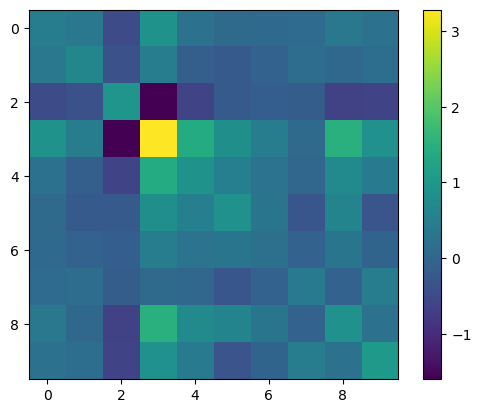

In [ ]:
p=10
Psi=np.eye(p)
a_cov = stats.invwishart(df=p+2, scale=Psi).rvs()
n=100
x=stats.multivariate_normal(mean=np.zeros(p), cov=a_cov).rvs(size=n)
plt.imshow(a_cov)
plt.colorbar();

In [ ]:
with pm.Model() as MNV_LKJ:

    packed_L = pm.LKJCholeskyCov("packed_L", n=p, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=2),
                                 compute_corr=False)
    L = pm.expand_packed_triangular(p, packed_L)
    Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    mu = pm.MvNormal('mu', mu=0, cov=np.eye(p), shape=p)
    y = pm.MvNormal('y', mu=mu, chol=L,  #cov=Sigma
                    shape=(n,1), observed=x)

    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [packed_L, mu]


/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.


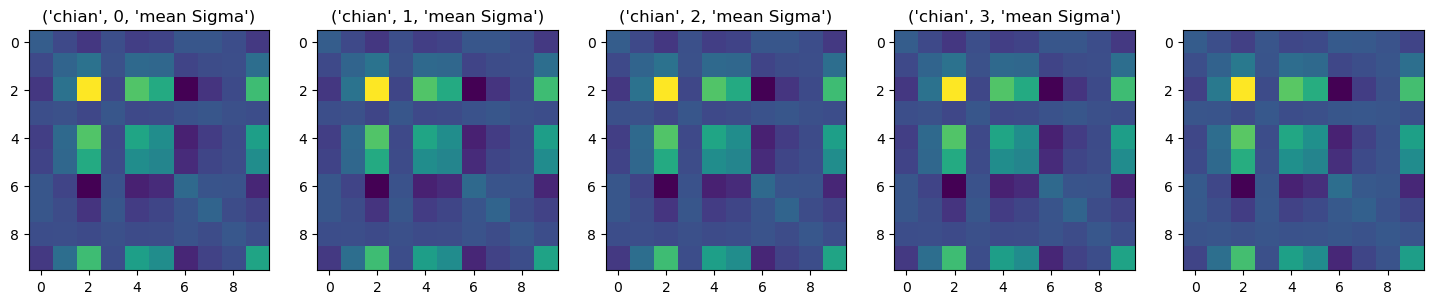

In [ ]:
fig,ax = plt.subplots(1,5,figsize=(18,4))
ax[-1].imshow(a_cov)
ax[0].set_title(("Sigma used to generate y"))
for chain in range(4):
    ax[chain].imshow(idata.posterior['Sigma'].mean(axis=1)[chain])
    ax[chain].set_title(("chian",chain,"mean Sigma"))

## MVN computation
* LKJ density on correlation calc is really easy to evaluate?
* computing the deterninant is very expensive if the matrix is dense


Using the **Cholesky decomposition** is desirable because it provides efficient computation **MVN** evaluations $(2\pi )^{-k/2}\det({\boldsymbol {\Sigma }})^{-1/2}\,\exp \left(-{\frac {1}{2}}( {y} -{X\beta})^\top{\boldsymbol {\Sigma }}^{-1}({y} - {X\beta})\right)$ since

- $\det({\boldsymbol {\Sigma }}) = \det({LL^T}) = \det({L}) \det({L^T}) = \prod_{k=1}^p  {L}_{kk}^2$

as already seen above, but now also

- $(\textbf{y}-\boldsymbol\mu)^\top\boldsymbol\Sigma^{-1}(\textbf{y}-\boldsymbol\mu) = \boldsymbol \epsilon^\top  {L}^{-\top} {L}^{-1} \boldsymbol \epsilon = \underbrace{( {L}^{-1} \boldsymbol \epsilon)^\top( {L}^{-1} \boldsymbol \epsilon) =  \textbf{x}^\top \textbf{x}}_{\Large \Longrightarrow \; {L} \textbf{x}\; =\; \boldsymbol \epsilon} $

where $\textbf{x}$ can be efficiently solved for based on **lower triangular backwards substitution** and hence $\textbf{x}^\top \textbf{x}$ directly computed without requiring the inversion $\Sigma^{-1}$


### Notes

In [ ]:
n,m,p = 100,10,5
beta_ = np.ones((p,m))
X = stats.norm().rvs((n,p))
a_cov = stats.invwishart(df=m+2, scale=np.eye(m)).rvs()
x = X@beta_ + stats.multivariate_normal(mean=np.zeros(m), cov=a_cov).rvs(size=n)

with pm.Model() as MNV_LKJ:

    packed_L = pm.LKJCholeskyCov("packed_L", n=m, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=m),
                                 compute_corr=False)
    L = pm.expand_packed_triangular(m, packed_L)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p,m))
    Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    y = pm.MvNormal('y', mu=X@betas, chol=L,  #cov=Sigma
                    observed=x)

    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [packed_L, betas]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.


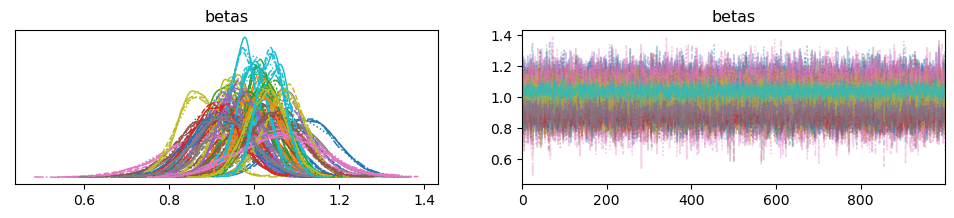

In [ ]:
import arviz as az

az.plot_trace(idata,var_names='betas');

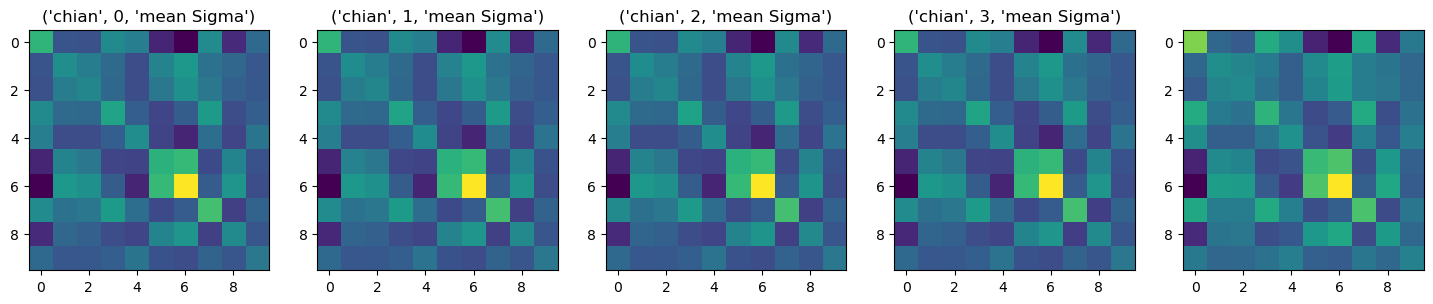

In [ ]:
fig,ax = plt.subplots(1,5,figsize=(18,4))
ax[-1].imshow(a_cov)
ax[0].set_title(("Sigma used to generate y"))
for chain in range(4):
    ax[chain].imshow(idata.posterior['Sigma'].mean(axis=1)[chain])
    ax[chain].set_title(("chian",chain,"mean Sigma"))

### Probit Regression (as opposed to Logistic Regression)

- $\Phi$ is CDF of standard normal (and is also call the **inverse probit** function)
    - The **probit** function is $\Phi^{-1}$
- $z_i \sim N(x_i^\top\beta,1)$


$$\int \Phi(z_i)^{y_i} (1-\Phi(z_i))^{1-y_i}d\Phi(z) = \Phi(x_i^\top\beta)^{y_i} (1-\Phi(x_i^\top\beta))^{1-y_i} = p_i^{y_i} (1-p_i)^{1-y_i} $$

### Notes

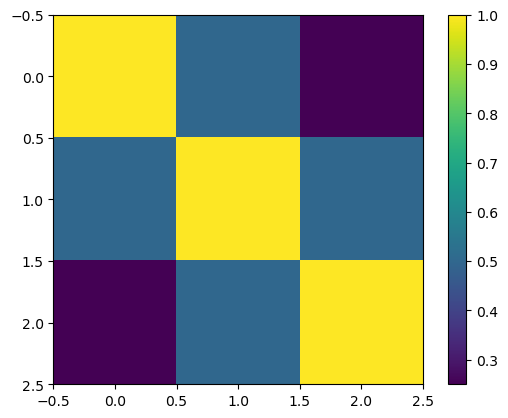

In [ ]:
n,m,p = 100,3,3
beta_ = np.ones((p,m))
X = stats.norm().rvs((n,p))
#a_cov = stats.invwishart(df=m+2, scale=np.ones(m)).rvs()
a_cor = (np.ones((p,p))+np.diag((1,1,1)))/2
a_cor[0,-1] = 0.25
a_cor[-1,0] = 0.25
x = X@beta_ + stats.multivariate_normal(mean=np.zeros(m), cov=a_cor).rvs(size=n)
plt.imshow(a_cor)
plt.colorbar()

# Make outcome binary
x = x>0

In [ ]:
with pm.Model() as GLM:

    L,R,std = pm.LKJCholeskyCov("R", n=m, eta=2.0,
                                sd_dist=pm.Exponential.dist(1.0, shape=m),
                                compute_corr=True)
    #L = pm.expand_packed_triangular(m, packed_L)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p,m))
    #Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    z = pm.MvNormal('z', mu=X@betas, cov=R) #cov=Sigma
    # the probit is the inverse cdf of a standard normal
    # the inverse probit is the cdf of a standard normal
    y = pm.Bernoulli('y', p=pm.math.invprobit(z), observed=x)
    # Integrating out z would give:
    #y = pm.Bernoulli('y', p=pm.math.invprobit(X@betas), observed=x)

    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [R, betas, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 141 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 1424 divergences after tuning. Increase `target_accept` or reparameterize.


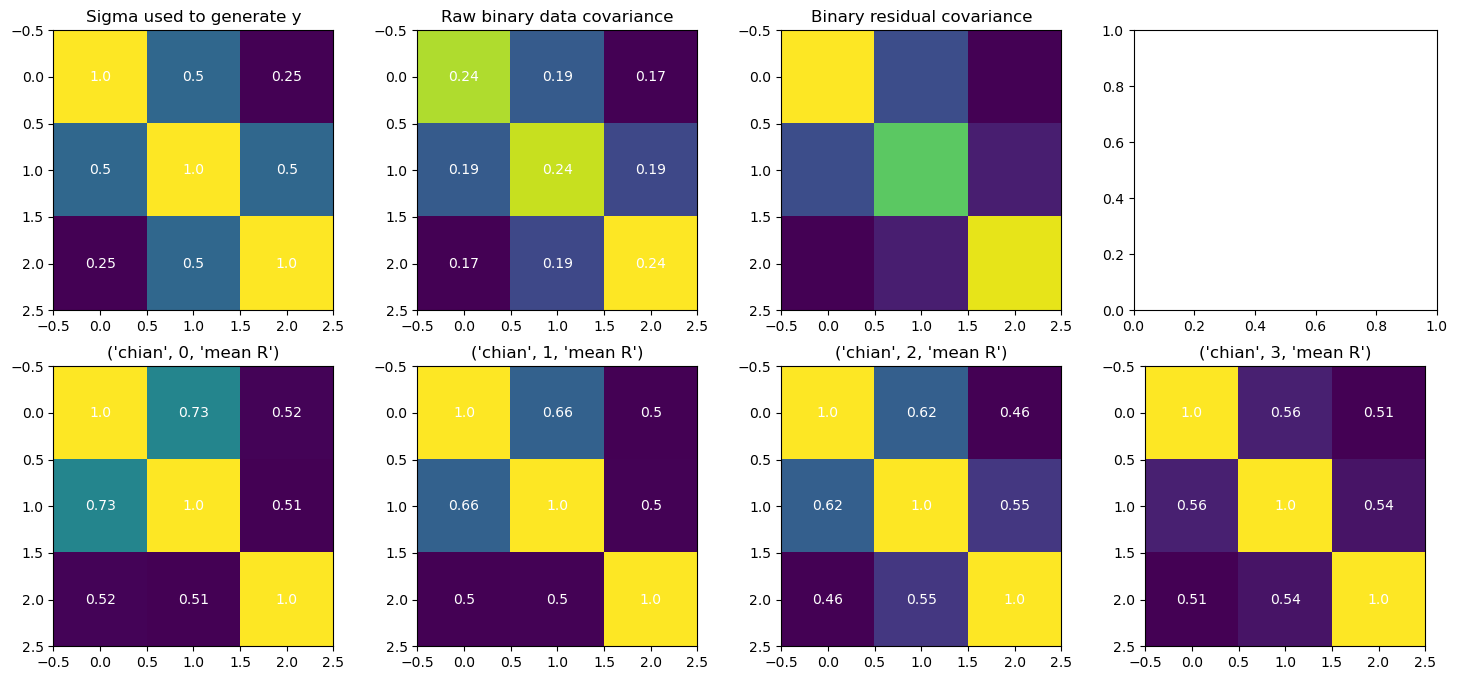

In [ ]:
fig,ax = plt.subplots(2,4,figsize=(18,8))
ax[0,0].imshow(a_cor)
ax[0,0].set_title(("Sigma used to generate y"))
for i in range(3):
    for j in range(3):
        ax[0,0].text(i,j,str(round(a_cor[j,i],2)),
                     c='w', ha='center', va='center')
ax[0,1].imshow(np.cov(x.T))
ax[0,1].set_title(("Raw binary data covariance"))
for i in range(3):
    for j in range(3):
        ax[0,1].text(i,j,str(round(np.cov(x.T)[j,i],2)),
                     c='w', ha='center', va='center')
ax[0,2].imshow(np.cov((x-stats.norm().cdf(X@beta_)).T))
ax[0,2].set_title(("Binary residual covariance"))
for chain in range(4):
    ax[1,chain].imshow(idata.posterior['R_corr'].mean(axis=1)[chain])
    for i in range(3):
        for j in range(3):
            ax[1,chain].text(i,j,str(round(idata.posterior['R_corr'].mean(axis=1)[chain].values[j,i],2)),
                             c='w', ha='center', va='center')
    ax[1,chain].set_title(("chian",chain,"mean R"))

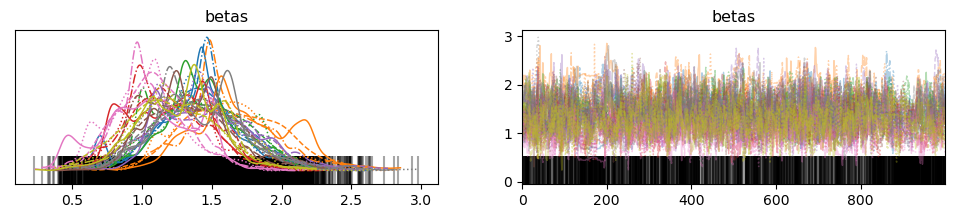

In [ ]:
az.plot_trace(idata,var_names='betas');

In [ ]:
n,p=100,10
X,y=np.zeros((n,p)), np.random.choice([0,1],size=n)

with pm.Model() as GLM:
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    z = pm.Normal('z', mu=X@betas, sigma=1)
    # Pr(z>0) is pm.math.invprobit(X@betas)
    # E[z] is X@betas
    y = pm.Bernoulli('y', p=pm.math.invprobit(X@betas), observed=y)

with GLM:
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [ ]:
n,p=100,10
X,y=np.zeros((n,p)), np.random.choice([0,1],size=n)

with pm.Model() as GLM:
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    z = pm.Normal('z', mu=X@betas, sigma=1)
    y = pm.Bernoulli('y', p=pm.math.invprobit(z), observed=y)

with GLM:
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


## Week 10 Homework

---

### Q1: perform Bayesian Logistic Regression

- For a binary outcome dataset you find interesting (perhaps from kaggle.com?)
- Model the outcome as a bernoulli random variable and use a **logit link** function
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than the `pm.MvNormal` version
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

### Q2: perform Bayesian Multivariate Regression

- For a data set for which modeling multiple continuous outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.MvNormal('y', mu=X@betas, chol=L, observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and
    - report on your findings and based on that
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics


**Comments from class:**
* log regression from last week - use the logit link function
* mutlivariate normal regression using template - focus on the data analysis and perform good statistical inference and show the bayesian diagnostics with the chains etc. focus on the inference and data analysis
* note that bayesian inference takes a long time to run (the MCMC chains)
* downsample the data set to avoid it from taking too long
  * the subproblem of discussing how large can n, m, and p be - just try different values to see where it starts getting slow to compute
* q3: multivariate probit classification
  * can also use a probit link function and then you would use the unverse CDF of a normal distribution
  * z in the code from last week: put prior on the betas, normal distribution on the z, and x_beta is a model on the latent z which determines the shape/dimension of z
    * there is no data that goes into the z, it is just randomly generated
    * this is what gets the linear model
  * inverse probit function takes the latent z as the argument and defines the probability for the ys
  
  


# Question 1

In [8]:
#@title Q1
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
from sklearn.preprocessing import StandardScaler

# load titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

# features and target
features = ['Pclass', 'Age', 'Fare']
target = 'Survived'
data = data[features + [target]]

# clean the data
data['Age'].fillna(data['Age'].median(), inplace=True)
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# convert data to numpy arrays
X_np = data.drop(columns=[target]).values
y_np = data[target].values



<ipython-input-8-664cfac3d304>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [10]:
#@title Q1
# Bayesian logistic regression model
with pm.Model() as logistic_model:
    # Priors for coefficients
    betas = pm.Normal('betas', mu=0, sigma=1, shape=X_np.shape[1])
    intercept = pm.Normal('intercept', mu=0, sigma=1)

    # linear combination
    linear_combination = intercept + pm.math.dot(X_np, betas)

    # logit link function
    p = pm.Deterministic('p', pm.math.sigmoid(linear_combination))

    # likelihood
    likelihood = pm.Bernoulli('likelihood', p=p, observed=y_np)

    # sampling
    trace = pm.sample(2000, tune=1000, cores=2, return_inferencedata=True)

# summarize the posterior
summary = az.summary(trace)
print(summary)


Output()

            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]  -0.883  0.112  -1.093   -0.671      0.003    0.002    1660.0   
betas[1]  -0.447  0.081  -0.607   -0.301      0.002    0.001    2198.0   
betas[2]   0.249  0.108   0.060    0.456      0.002    0.002    2332.0   
intercept  1.512  0.258   1.052    2.022      0.006    0.004    1718.0   
p[0]       0.268  0.020   0.228    0.302      0.000    0.000    4062.0   
...          ...    ...     ...      ...        ...      ...       ...   
p[886]     0.433  0.024   0.393    0.481      0.000    0.000    2499.0   
p[887]     0.724  0.038   0.654    0.795      0.001    0.001    1705.0   
p[888]     0.244  0.020   0.207    0.280      0.000    0.000    2875.0   
p[889]     0.674  0.036   0.607    0.740      0.001    0.001    1785.0   
p[890]     0.206  0.018   0.173    0.242      0.000    0.000    2865.0   

           ess_tail  r_hat  
betas[0]     2032.0    1.0  
betas[1]     2268.0    1.0  
betas[2]     2135.0    1

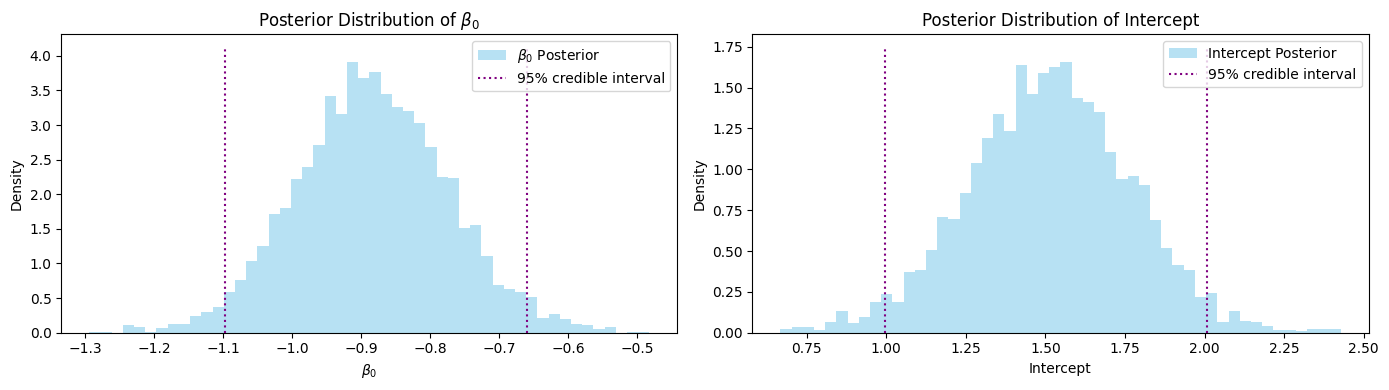

In [11]:
#@title Q1

import numpy as np
import matplotlib.pyplot as plt

burn = 500
betas_samples = trace.posterior['betas'].values.reshape(-1, X_np.shape[1])
intercept_samples = trace.posterior['intercept'].values.flatten()

# 95% credible intervals
betas_cred_int = np.quantile(betas_samples[:, 0][burn:], [0.025, 0.975])  # Example: First coefficient
intercept_cred_int = np.quantile(intercept_samples[burn:], [0.025, 0.975])

# create the plot
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# plot for beta_0
axes[0].hist(betas_samples[:, 0][burn:], bins=50, density=True, alpha=0.6, color='skyblue', label=r'$\beta_0$ Posterior')
axes[0].vlines(x=betas_cred_int, ymin=0, ymax=axes[0].get_ylim()[1], color='purple', linestyle=':', label='95% credible interval')
axes[0].set_title(r'Posterior Distribution of $\beta_0$')
axes[0].set_xlabel(r'$\beta_0$')
axes[0].set_ylabel('Density')
axes[0].legend()

# plot for intercept
axes[1].hist(intercept_samples[burn:], bins=50, density=True, alpha=0.6, color='skyblue', label=r'Intercept Posterior')
axes[1].vlines(x=intercept_cred_int, ymin=0, ymax=axes[1].get_ylim()[1], color='purple', linestyle=':', label='95% credible interval')
axes[1].set_title('Posterior Distribution of Intercept')
axes[1].set_xlabel('Intercept')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()


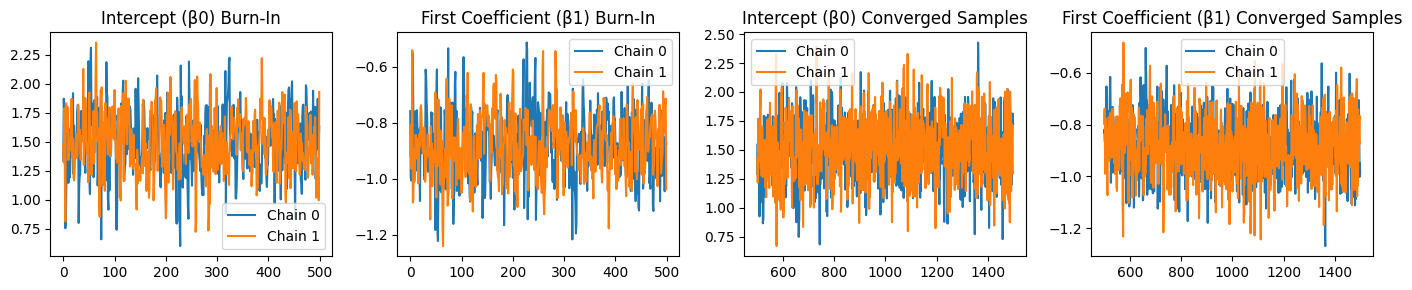

In [12]:
#@title Q1

import matplotlib.pyplot as plt
import numpy as np

posterior_betas = trace.posterior['betas'].values
posterior_intercept = trace.posterior['intercept'].values

burn_in = 500
demo_range = 1500
C = posterior_betas.shape[0]

fig, ax = plt.subplots(1, 4, figsize=(14, 3))

# titles for subplots
ax[0].set_title("Intercept (β0) Burn-In")
ax[1].set_title("First Coefficient (β1) Burn-In")
ax[2].set_title("Intercept (β0) Converged Samples")
ax[3].set_title("First Coefficient (β1) Converged Samples")

for c in range(C):
    # for intercept
    ax[0].plot(posterior_intercept[c, :burn_in], label=f"Chain {c}")

    # first regression coefficient (β1)
    ax[1].plot(posterior_betas[c, :burn_in, 0], label=f"Chain {c}")

    # converged samples for intercept
    ax[2].plot(np.arange(burn_in, demo_range),
               posterior_intercept[c, burn_in:demo_range], label=f"Chain {c}")

    # converged samples for first regression coefficient (β1)
    ax[3].plot(np.arange(burn_in, demo_range),
               posterior_betas[c, burn_in:demo_range, 0], label=f"Chain {c}")


for a in ax:
    a.legend()
plt.tight_layout()
plt.show()


# Question 2

In [14]:
#@title Q2
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load the dataset
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

data_red = pd.read_csv(url_red, sep=';')
data_white = pd.read_csv(url_white, sep=';')

# combine data
data_red['type'] = 0  # Red wine
data_white['type'] = 1  # White wine
data = pd.concat([data_red, data_white], ignore_index=True)

predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol', 'type']
outcomes = ['quality']

X = data[predictors].values
Y = data[outcomes].values

# standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
#@title Downsample Q2
import numpy as np

# parameters i
n_samples = 100
p_features = 3
m_outputs = 1

# randomly select samples and features
np.random.seed(410)
sample_indices = np.random.choice(X_scaled.shape[0], n_samples, replace=False)
feature_indices = np.random.choice(X_scaled.shape[1], p_features, replace=False)

X_downsampled = X_scaled[sample_indices][:, feature_indices]
Y_downsampled = Y[sample_indices][:, :m_outputs]


In [23]:
#@title Bayesian Multivariate Regression Q2
import pymc as pm
import numpy as np
import pytensor.tensor as pt

n, p = X_downsampled.shape
m = Y_downsampled.shape[1]

with pm.Model() as model:
    # priors
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p, m))
    intercept = pm.Normal('intercept', mu=0, sigma=1, shape=(m,))

    # expected value of outcome
    mu = pm.math.dot(X_downsampled, betas) + intercept

    sigma = pm.Exponential('sigma', 1.0, shape=(m,))
    cov_matrix = pm.Deterministic('cov_matrix', pt.diag(sigma**2))

    # likelihood
    y_obs = pm.MvNormal('y_obs', mu=mu, cov=cov_matrix, observed=Y_downsampled)

    # sampling
    trace = pm.sample(1000, tune=1000, return_inferencedata=True)


Output()

                   mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0]       0.127  0.091  -0.050    0.289      0.002    0.002    1595.0   
betas[1, 0]       0.066  0.085  -0.090    0.227      0.002    0.002    1650.0   
betas[2, 0]       0.057  0.082  -0.090    0.218      0.002    0.002    1607.0   
cov_matrix[0, 0]  0.633  0.093   0.464    0.805      0.002    0.001    2010.0   
intercept[0]      5.736  0.079   5.570    5.873      0.002    0.001    2182.0   
sigma[0]          0.793  0.058   0.686    0.902      0.001    0.001    2010.0   

                  ess_tail  r_hat  
betas[0, 0]         1646.0    1.0  
betas[1, 0]         1554.0    1.0  
betas[2, 0]         1549.0    1.0  
cov_matrix[0, 0]    1427.0    1.0  
intercept[0]        1630.0    1.0  
sigma[0]            1427.0    1.0  


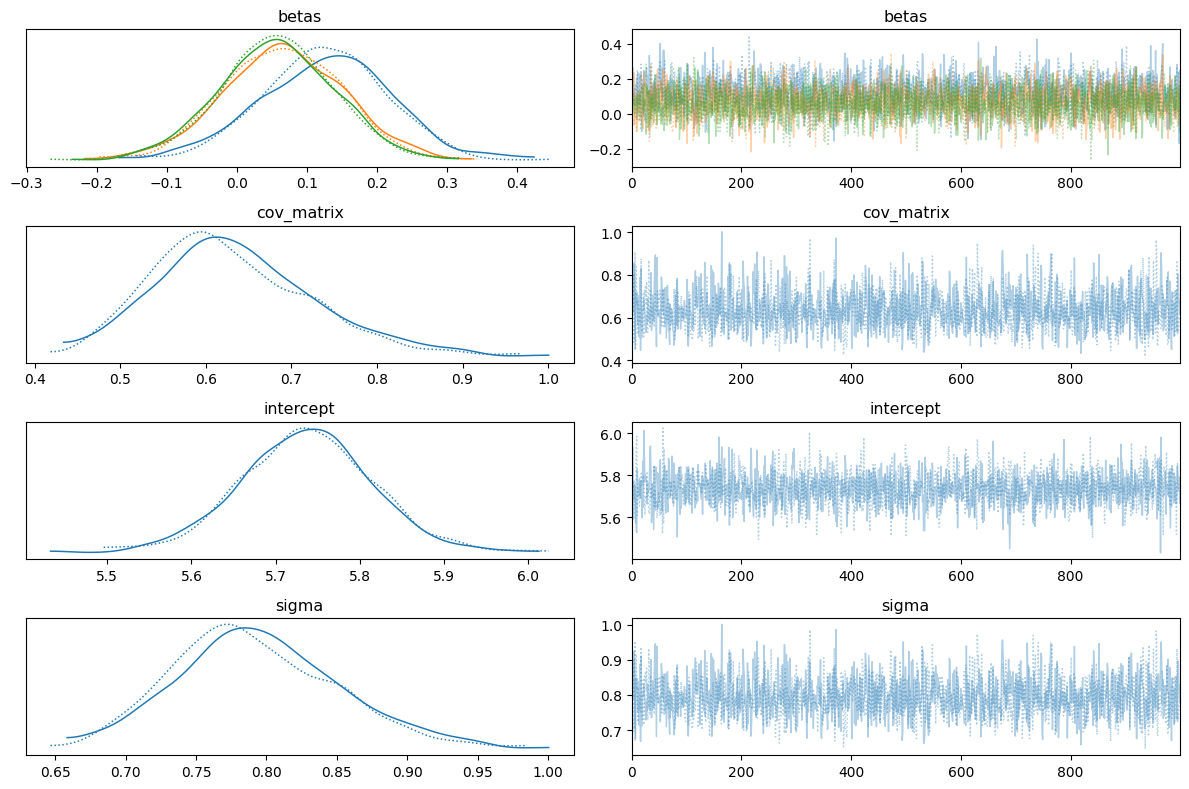

In [25]:
#@title Q2 Diagnostics
import arviz as az

# summary of the posterior
summary = az.summary(trace)
print(summary)

# trace plots
az.plot_trace(trace)
plt.tight_layout()
plt.show()

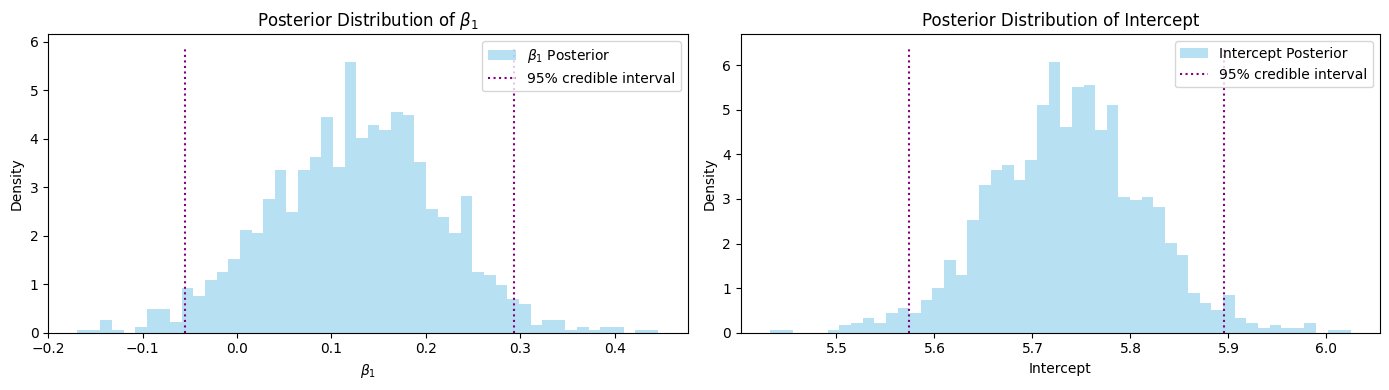

In [26]:
#@title Q2 Plots
burn = 500

# posterior samples from the trace
betas_samples = trace.posterior['betas'].values.reshape(-1, p)
intercept_samples = trace.posterior['intercept'].values.flatten()

# 95% credible intervals
betas_cred_int = np.quantile(betas_samples[:, 0][burn:], [0.025, 0.975])  # First coefficient
intercept_cred_int = np.quantile(intercept_samples[burn:], [0.025, 0.975])

# posterior distribution with credible intervals
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# plot for first coefficient β1
axes[0].hist(betas_samples[:, 0][burn:], bins=50, density=True, alpha=0.6, color='skyblue', label=r'$\beta_1$ Posterior')
axes[0].vlines(x=betas_cred_int, ymin=0, ymax=axes[0].get_ylim()[1], color='purple', linestyle=':', label='95% credible interval')
axes[0].set_title(r'Posterior Distribution of $\beta_1$')
axes[0].set_xlabel(r'$\beta_1$')
axes[0].set_ylabel('Density')
axes[0].legend()

# plot for intercept
axes[1].hist(intercept_samples[burn:], bins=50, density=True, alpha=0.6, color='skyblue', label=r'Intercept Posterior')
axes[1].vlines(x=intercept_cred_int, ymin=0, ymax=axes[1].get_ylim()[1], color='purple', linestyle=':', label='95% credible interval')
axes[1].set_title('Posterior Distribution of Intercept')
axes[1].set_xlabel('Intercept')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()


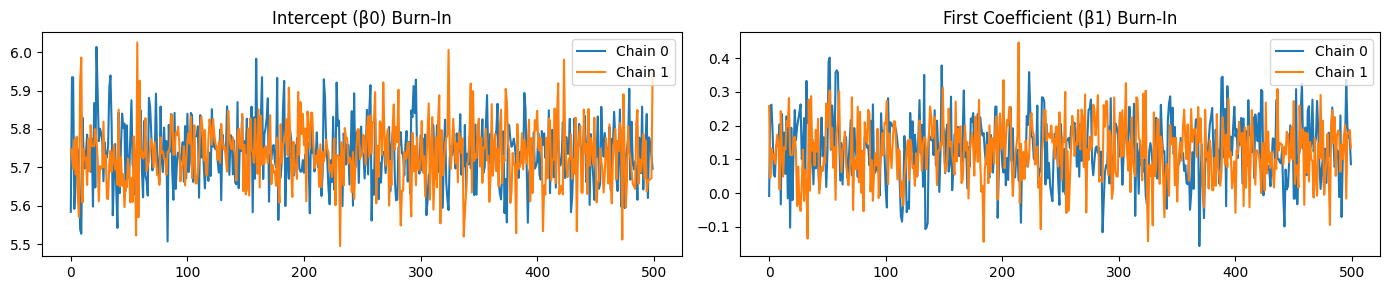

In [28]:
#@title Q2 plots
# Extract posterior samples
posterior_betas = trace.posterior['betas'].values  # Shape: (chains, draws, p, m)
posterior_intercept = trace.posterior['intercept'].values  # Shape: (chains, draws, m)

# Define burn-in period and demo range
burn_in = 500
demo_range = 1500
C = posterior_betas.shape[0]  # Number of chains

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 3))

# Titles for subplots
ax[0].set_title("Intercept (β0) Burn-In")
ax[1].set_title("First Coefficient (β1) Burn-In")


# Plot burn-in phase and converged samples for each chain
for c in range(C):
    ax[0].plot(posterior_intercept[c, :burn_in, 0], label=f"Chain {c}")
    ax[1].plot(posterior_betas[c, :burn_in, 0, 0], label=f"Chain {c}")
# Add legends
for a in ax:
    a.legend()

plt.tight_layout()
plt.show()


### Q3: perform Bayesian Multivariate Classification

- For a data set for which modeling multiple binary outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.Bernoulli('y', p=pm.math.invprobit(X@betas), observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Use latent `z = pm.MvNormal('z', mu=X@betas, chol=L)` as discussed in the "Generalized Linear Models (GLM)" section of the previous weeks lecture notes

> This provides normally distributed latent variables connected to the observed binary outcomes on which a latent covariance dependency structure may be modelled and estimated on the basis of imputing the unobserved latent variables based on their connection with the observed binary outcome variables.

- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and
    - report on your findings and based on that
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics


In [ ]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
from scipy import stats

# dataset parameters
n, m, p = 100, 3, 3  # Samples, binary outcomes, predictors

# generate true betas (coefficient matrix)
beta_ = np.ones((p, m))

# generate predictor matrix X (n x p)
X = stats.norm().rvs((n, p))

# correlation structure
a_cor = (np.ones((m, m)) + np.diag((1, 1, 1))) / 2
a_cor[0, -1] = 0.25
a_cor[-1, 0] = 0.25

# latent variable x (n x m)
x = X @ beta_ + stats.multivariate_normal(mean=np.zeros(m), cov=a_cor).rvs(size=n)

# convert continuous outcomes into binary outcomes
x = x > 0  # Threshold at 0 for classification

# visualize the correlation matrix
plt.imshow(a_cor)
plt.colorbar()
plt.title("True Covariance Structure Used to Generate Data")
plt.show()

# Bayesian Multivariate Probit Regression Model
with pm.Model() as GLM:
    # cholesky decomposition for covariance structure
    L, R, std = pm.LKJCholeskyCov(
        "R",
        n=m,
        eta=2.0,
        sd_dist=pm.Exponential.dist(1.0, shape=m),
        compute_corr=True
    )

    # Define priors for regression coefficients
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p, m))

    # Latent variable
    z = pm.MvNormal('z', mu=pm.math.dot(X, betas), chol=R, shape=(n, m))

    # Probit classification
    y = pm.Bernoulli('y', p=pm.math.invprobit(z), observed=x)

    # Perform MCMC sampling
    idata = pm.sample(1000, tune=1000, target_accept=0.9, return_inferencedata=True)


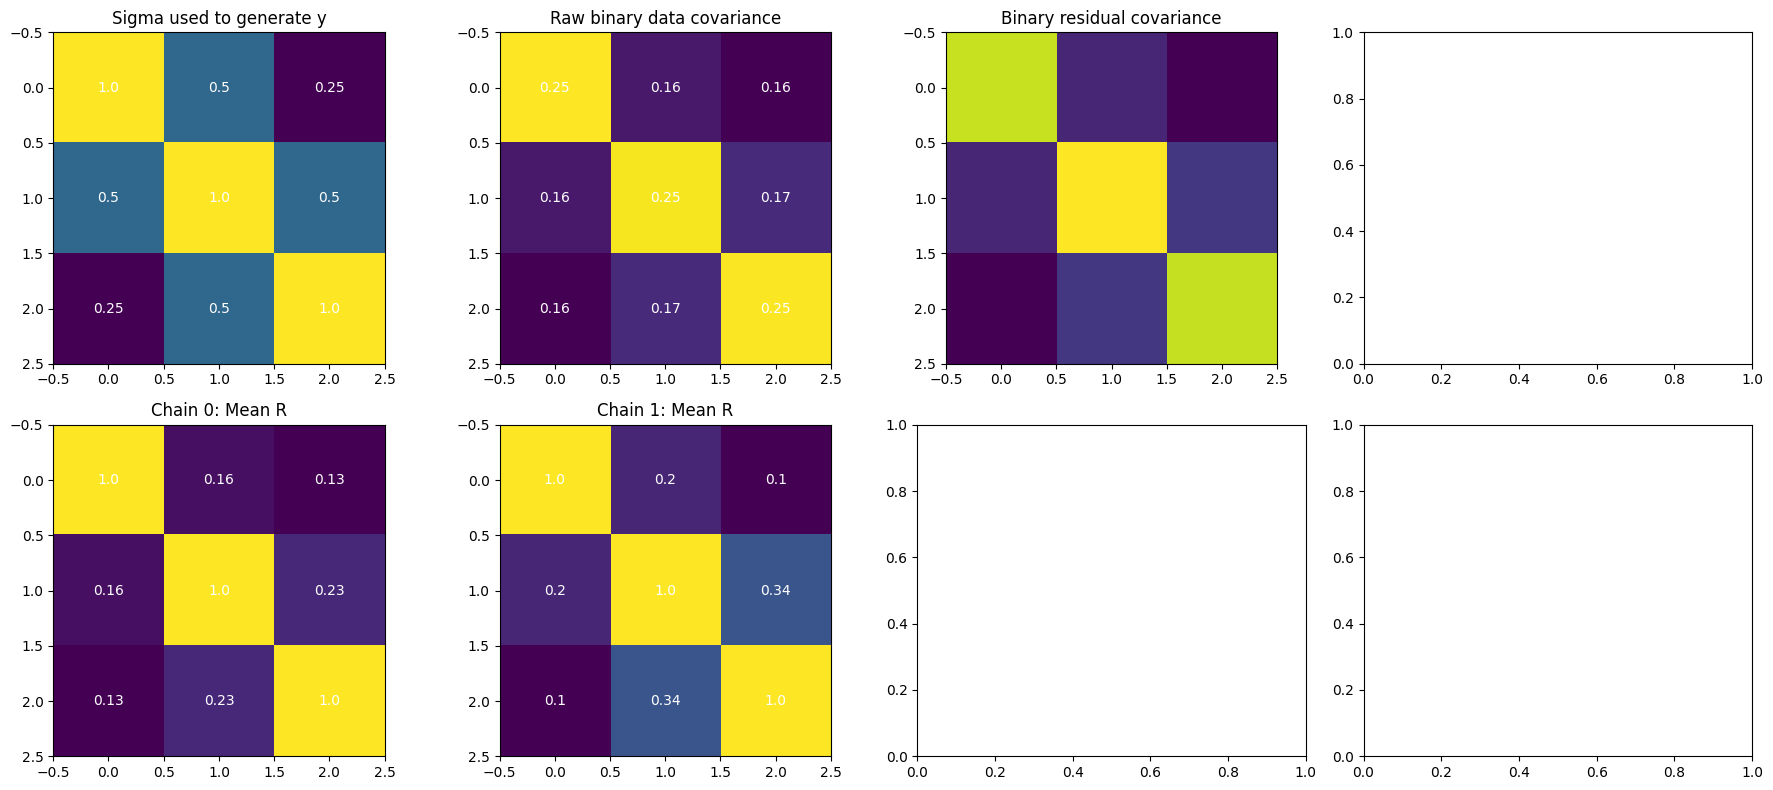

In [32]:
# visualization
fig, ax = plt.subplots(2, 4, figsize=(18, 8))

# covariance matrix used in data generation
ax[0, 0].imshow(a_cor)
ax[0, 0].set_title("Sigma used to generate y")
for i in range(m):
    for j in range(m):
        ax[0, 0].text(i, j, str(round(a_cor[j, i], 2)), c='w', ha='center', va='center')

# binary data covariance
ax[0, 1].imshow(np.cov(x.T))
ax[0, 1].set_title("Raw binary data covariance")
for i in range(m):
    for j in range(m):
        ax[0, 1].text(i, j, str(round(np.cov(x.T)[j, i], 2)), c='w', ha='center', va='center')

# residual covariance
ax[0, 2].imshow(np.cov((x - stats.norm().cdf(X @ beta_)).T))
ax[0, 2].set_title("Binary residual covariance")

# posterior mean estimates of the correlation matrix R for each chain
num_chains = idata.posterior['R_corr'].shape[0]  # Get actual number of chains
for chain in range(num_chains):  # Only loop over existing chains
    ax[1, chain].imshow(idata.posterior['R_corr'].mean(axis=1)[chain])
    for i in range(m):
        for j in range(m):
            ax[1, chain].text(i, j, str(round(idata.posterior['R_corr'].mean(axis=1)[chain].values[j, i], 2)),
                              c='w', ha='center', va='center')
    ax[1, chain].set_title(f"Chain {chain}: Mean R")

plt.tight_layout()
plt.show()